#### Question 1
What is regularization in the context of deep learning. Why is it important?
#### Ans
Regularization in deep learning refers to techniques that are used to prevent overfitting, when the model is complex and memorizes the noise also. Regularization helps to generalize the model's performance on unseen data by adding a penalty term to the loss function.

Regularization is important for the following reasons:

* Preventing overfitting: Regularization techniques like L1 and L2 regularization, dropout help prevent overfitting by constraining the model's parameters.

* Improving generalization: By reducing overfitting, regularization allows the model to generalize better to unseen data. It helps the model focus on important features and patterns in the data rather than noise or irrelevant details.

* Handling limited training data: In scenarios where the available training data is limited, regularization becomes even more crucial. It helps prevent the model from memorizing the limited examples.

* Reducing model complexity: Regularization techniques discourage the model from becoming overly complex, which can lead to poor generalization.

#### Question 2
Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff
#### Ans
The bias-variance tradeoff is a fundamental concept in deep learning that describes the relationship between the model's bias and its variance.Bias: Bias measures how far off the predictions of a model are from the true values in the training data. Variance refers to the sensitivity of a model to fluctuations in the training data. A high variance suggests that the model is too sensitive to noise or random variations in the training data, resulting in overfitting.  
Regularization helps address the bias-variance tradeoff by controlling the complexity of the model and reducing overfitting. Regularization techniques introduce a penalty term to the loss function,therby reducing complexity in the model and enabling the model to generalise and make better predictions.This helps strike a balance between bias and variance, leading to improved generalization performance.

#### Question 3
Describe the concept of L1 and L2 regularization. How do they differ in terms of penalty calculation and their effects on the models
#### Ans
L1 Regularization (Lasso):

Penalty Calculation:  
L1 regularization adds the absolute value of the coefficients (weights) of the model as the penalty term to the loss function.  
Effect on Models:
L1 regularization encourages sparsity in the model by driving some coefficients to exactly zero. It effectively selects a subset of the most important features, leading to a more interpretable model and reducing overfitting.

L2 Regularization (Ridge):
   
Penalty Calculation:  
L2 regularization adds the squared value of the coefficients (weights) of the model as the penalty term to the loss function.  
Effect on Models:  
L2 regularization does not promote sparsity as strongly as L1 regularization. It encourages the model to have small weights across all features rather than driving specific weights to zero. L2 regularization can help control the magnitude of weights and prevent overfitting.

#### Question 4
Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.
#### Ans
Regularization methods help in reducing overfitting by:  

* Reducing model complexity: Regularization techniques, such as L1 and L2 regularization, penalize large parameter values or introduce constraints, encouraging the model to be simpler.
* Generalizing the model: It mitigates the effect of noise or outliers in the training data. Hence, prevents the model from memorizing the training data resulting in overfitting

#### Question 5
Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference.
#### Ans
Dropout regularization is a technique used to reduce overfitting in deep learning models. It works by randomly setting a fraction of the model's units (neurons) to zero during training, effectively "dropping out" those units from the network temporarily. This prevents the units from co-adapting.  
* Impact on Training:  
During training, Dropout is applied to the units with a specified dropout rate. The dropped out units are randomly selected for each mini-batch. This introduces noise and prevents the model from relying too heavily on specific units, features, or interactions.
*  Impact on Inference:
During inference or prediction, Dropout is turned off, and all units are used. However, the learned weights of the units are scaled by the dropout rate to ensure that the expected output remains the same as during training. This scaling is necessary because during training, the activations of dropped out units are multiplied by the inverse of the dropout rate to maintain the overall expected activation.

#### Question 6
Describe the concept of Early stopping as a form of regularization. How does it help prevent overfitting during the training process
#### Ans
Early stopping is a form of regularization that helps prevent overfitting during the training process of a machine learning model. It involves monitoring the model's performance on a validation set during training and stopping the training process when the performance on the validation set starts to degrade.

The concept behind early stopping is that as training progresses, the model learns to fit the training data more closely, potentially leading to overfitting. By monitoring the validation set, we can identify when the model's performance on unseen data starts to deteriorate, indicating that it is overfitting.


#### Question 7
Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting
#### Ans
Batch Normalization is a technique used in deep learning to normalize the activations of each layer in a neural network. It helps in addressing the internal covariate shift problem and also acts as a form of regularization.

The main idea behind Batch Normalization is to normalize the inputs to each layer by subtracting the batch mean and dividing by the batch standard deviation. This ensures that the activations have zero mean and unit variance, which stabilizes the learning process and speeds up convergence.  

Q8 IMPLEMENTING DROPOUT

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
print(f'tensorflow version {tf.__version__}')
print(f'tensorflow version {tf.keras.__version__}')

tensorflow version 2.12.0
tensorflow version 2.12.0


In [2]:
(X_train_full,y_train_full),(X_test_full,y_test_full)=tf.keras.datasets.cifar10.load_data()
X_train_full.shape,y_train_full.shape,X_test_full.shape,y_test_full.shape

170498071/170498071 [==============================] - 11s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test_full=X_test_full/255.

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[32,32,3]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history1=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 26s 18ms/step - loss: 2.2524 - accuracy: 0.1312 - val_loss: 2.1474 - val_accuracy: 0.1734
Epoch 2/10
1407/1407 [==============================] - 28s 20ms/step - loss: 2.2284 - accuracy: 0.1378 - val_loss: 2.1673 - val_accuracy: 0.1762
Epoch 3/10
1407/1407 [==============================] - 25s 18ms/step - loss: 2.2295 - accuracy: 0.1373 - val_loss: 2.1490 - val_accuracy: 0.1678
Epoch 4/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2230 - accuracy: 0.1367 - val_loss: 2.1312 - val_accuracy: 0.1720
Epoch 5/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2222 - accuracy: 0.1382 - val_loss: 2.1435 - val_accuracy: 0.1922
Epoch 6/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2229 - accuracy: 0.1398 - val_loss: 2.1354 - val_accuracy: 0.1904
Epoch 7/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2204 - accuracy: 0.1401 - val_loss: 2.1639 -

313/313 [==============================] - 1s 4ms/step - loss: 2.1561 - accuracy: 0.1862
The loss evaluated is 2.156132698059082
The accuracy of the model is evaluated as 0.18619999289512634


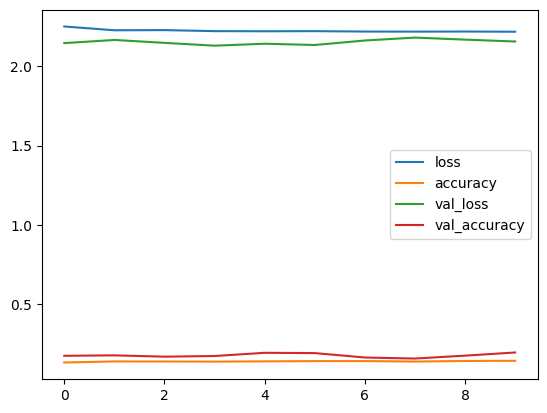

In [14]:
pd.DataFrame(history1.history).plot()
loss,accuracy=model.evaluate(X_test_full,y_test_full)
print(f'The loss evaluated is {loss}')
print(f'The accuracy of the model is evaluated as {accuracy}')

In [13]:
# Evaluate the model without Dropout regularization
model_no_dropout = tf.keras.models.clone_model(model)
model_no_dropout.set_weights(model.get_weights())

model_no_dropout.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

history2=model_no_dropout.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 26s 18ms/step - loss: 2.2185 - accuracy: 0.1400 - val_loss: 2.1353 - val_accuracy: 0.1964
Epoch 2/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2155 - accuracy: 0.1399 - val_loss: 2.1466 - val_accuracy: 0.1654
Epoch 3/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2191 - accuracy: 0.1380 - val_loss: 2.1806 - val_accuracy: 0.1736
Epoch 4/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2151 - accuracy: 0.1424 - val_loss: 2.1730 - val_accuracy: 0.1676
Epoch 5/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2169 - accuracy: 0.1397 - val_loss: 2.1168 - val_accuracy: 0.1960
Epoch 6/10
1407/1407 [==============================] - 24s 17ms/step - loss: 2.2173 - accuracy: 0.1390 - val_loss: 2.1822 - val_accuracy: 0.1646
Epoch 7/10
1407/1407 [==============================] - 25s 18ms/step - loss: 2.2184 - accuracy: 0.1391 - val_loss: 2.1358 -

313/313 [==============================] - 1s 4ms/step - loss: 2.1561 - accuracy: 0.1862
The loss evaluated is 2.156132698059082
The accuracy of the model is evaluated as 0.18619999289512634


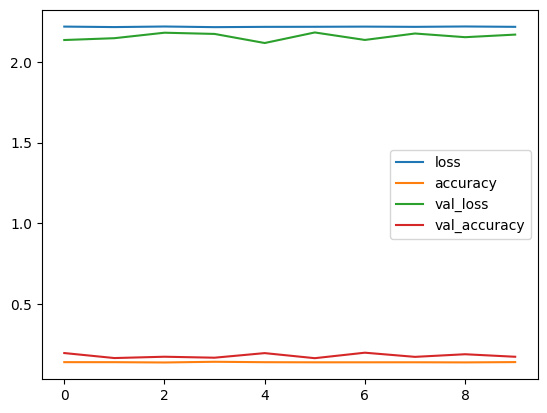

In [15]:
pd.DataFrame(history2.history).plot()
loss,accuracy=model.evaluate(X_test_full,y_test_full)
print(f'The loss evaluated is {loss}')
print(f'The accuracy of the model is evaluated as {accuracy}')

#### Question 9
#### Ans
Considerations and tradeoffs when choosing the appropriate regularization technique for a given deep learning task include:

* Effectiveness: Different regularization techniques have varying degrees of effectiveness in combating overfitting. Consider the performance of each technique in similar tasks or domains.

* Model Complexity: The complexity of your model can impact the choice of regularization technique. More complex models may require stronger regularization techniques to prevent overfitting.

* Interpretability: Some regularization techniques, like L1 regularization, promote sparsity and feature selection, making the model more interpretable. Consider whether interpretability is important for your task.

* Computational Cost: Certain regularization techniques, such as Dropout or data augmentation, introduce additional computational overhead during training. Assess whether the computational cost is feasible within your available resources.

* Training Data Size: The size of your training data affects the effectiveness of different regularization techniques. With smaller datasets, regularization becomes more important to prevent overfitting.